** What factors most influence whether a gladiator survives (e.g., health status, patron wealth, equipment quality)? **

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [136]:
# Step 1: Load the dataset
file_path = 'gladiator_data.csv'
gladiator_df = pd.read_csv(file_path)

In [137]:
# Look at the data
gladiator_df.head()

,Name,Age,Birth Year,Origin,Height,Weight,Category,Wins,Losses,Special Skills,...,Battle Experience,Psychological Profile,Health Status,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived
0,Novellius Probus,21,29,Gaul,180,74,Hoplomachus,4,1,Novice,...,5,Fearful,Excellent,Vengeance,Criminal,Medium,Balanced,Low,Humble,False
1,Baebius Geta,36,14,Numidia,174,80,Thraex,10,2,Novice,...,12,Fearful,Excellent,Freedom,Entertainer,Medium,Balanced,Medium,Charismatic,True
2,Rufius Gordian,29,21,Germania,157,94,Hoplomachus,6,2,Speed,...,8,Aggressive,Excellent,Glory,Unemployed,Medium,Aggressive,Medium,Charismatic,True
3,Pettius Appius,21,29,Greece,177,72,Thraex,7,1,Tactics,...,8,Stoic,Excellent,Glory,Laborer,Medium,Aggressive,Medium,Charismatic,True
4,Clodius Fundanus,26,24,Rome,178,104,Provocator,5,0,Novice,...,5,Calculative,Excellent,Wealth,Entertainer,Medium,Aggressive,Low,Intimidating,True


In [138]:
gladiator_df['Health Status']

0         Excellent
1         Excellent
2         Excellent
3         Excellent
4         Excellent
            ...    
107459    Excellent
107460         Fair
107461    Excellent
107462         Good
107463    Excellent
Name: Health Status, Length: 107464, dtype: object

In [139]:
gladiator_df.columns

Index(['Name', 'Age', 'Birth Year', 'Origin', 'Height', 'Weight', 'Category',
       'Wins', 'Losses', 'Special Skills', 'Weapon of Choice', 'Patron Wealth',
       'Equipment Quality', 'Public Favor', 'Injury History',
       'Mental Resilience', 'Diet and Nutrition', 'Tactical Knowledge',
       'Allegiance Network', 'Battle Experience', 'Psychological Profile',
       'Health Status', 'Personal Motivation', 'Previous Occupation',
       'Training Intensity', 'Battle Strategy', 'Social Standing',
       'Crowd Appeal Techniques', 'Survived'],
      dtype='object')

In [140]:
# Get the unique values and count for the 'Health Status' column
unique_health_status = gladiator_df["Health Status"].unique()
count_health_status = len(unique_health_status)

# Display the results
print("Unique Health Status attributes:", unique_health_status)
print("Number of unique Health Status attributes:", count_health_status)


Unique Health Status attributes: ['Excellent' 'Good' 'Fair']
Number of unique Health Status attributes: 3


In [141]:
# Get the unique values and count for the 'Health Status' column
uniquemMental_resilience = gladiator_df["Mental Resilience"].unique()
count_health_status = len(uniquemMental_resilience)

# Display the results
print("Unique Mental Resilience attributes:", uniquemMental_resilience)
print("Number of unique Mental Resilience attributes:", count_health_status)


Unique Mental Resilience attributes: [5.71680578 4.02004656 5.1145172  ... 6.01502743 5.29108265 2.06487335]
Number of unique Mental Resilience attributes: 107464


## Top Factors Influencing Gladiator Survival

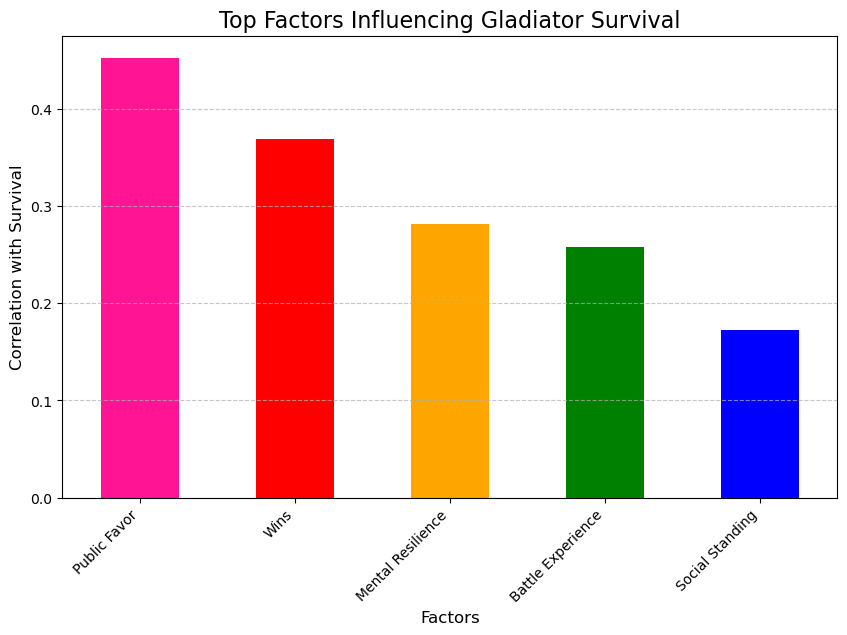

In [142]:
# Step 2: Process the data
gladiator_data_cleaned = gladiator_df.copy()

# Convert columns that aren't numerical to numerical equivalants.
categorical_mappings = {
    "Health Status": {"Excellent": 3, "Good": 2, "Fair": 1},
    "Personal Motivation": {"Vengeance": 3, "Freedom": 2, "Glory": 1, "Wealth": 0},
    "Psychological Profile": {"Fearful": 1, "Stoic": 2, "Aggressive": 3, "Calculative": 4},
    "Training Intensity": {"High": 3, "Medium": 2, "Low": 1},
    "Battle Strategy": {"Aggressive": 3, "Balanced": 2, "Defensive": 1},
    "Social Standing": {"High": 3, "Medium": 2, "Low": 1},
    "Crowd Appeal Techniques": {"Charismatic": 3, "Humble": 2, "Intimidating": 1}
}

# Apply the converted columns to relevant columns
for column, mapping in categorical_mappings.items():
    if column in gladiator_data_cleaned.columns:
        gladiator_data_cleaned[column] = gladiator_data_cleaned[column].map(mapping)

# Create a format for survival column
gladiator_data_cleaned["Survived"] = gladiator_data_cleaned["Survived"].astype(int)

# Select the columns for correlation
number_columns = gladiator_data_cleaned.select_dtypes(include=[np.number])

# Step 3: Compute correlations
correlation_df = number_columns.corr()

# Focus on factors influencing "Survived"
survival_corr_df = correlation_df["Survived"].sort_values(ascending=False)

# Step 4: Extract the top factors (excluding "Survived" itself)
most_factors = survival_corr_df.drop("Survived").sort_values(ascending=False).head(5)

# print(most_factors.head())

# Step 5: Plot the top correlations
plt.figure(figsize=(10, 6))
most_factors.plot(kind="bar", color=['deeppink', 'red', 'orange', 'green', 'blue', 'purple', 'red'])
plt.title("Top Factors Influencing Gladiator Survival", fontsize=16)
plt.xlabel("Factors", fontsize=12)
plt.ylabel("Correlation with Survival", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
# plt.tight_layout()

plt.show()

## Top Factors Influencing Public Favor

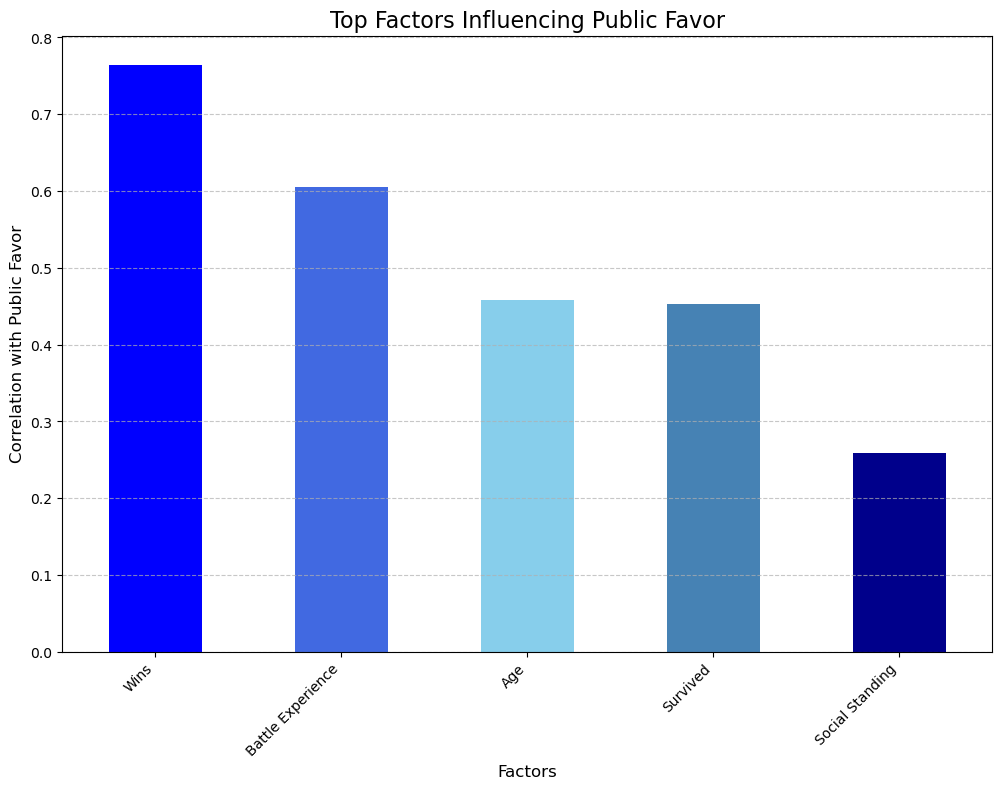

In [143]:
# Select numerical columns from the full dataset
numerical_data = gladiator_data_cleaned.select_dtypes(include=[np.number])

# Compute correlations with "Public Favor" across the entire dataset
public_favor_correlation = numerical_data.corr()["Public Favor"].sort_values(ascending=False)

# Extract the top 5 factors most correlated with public favor
top_factors_public_favor = public_favor_correlation.drop("Public Favor").head(5)

# List the results
# print(top_factors_public_favor.head())

# Plot the results
plt.figure(figsize=(12, 8))
top_factors_public_favor.plot(kind="bar", color=['blue', 'royalblue', 'skyblue', 'steelblue', 'darkblue'])
plt.title("Top Factors Influencing Public Favor", fontsize=16)
plt.xlabel("Factors", fontsize=12)
plt.ylabel("Correlation with Public Favor", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
# plt.tight_layout()

plt.show()

## Composite Score=(Wins×0.4)+(Battle Experience×0.3)+(Public Favor×0.2)+(Survived×0.1)
## Explanation of Weights:
## Wins (0.4): Wins are weighted most heavily as they reflect direct success in battles.
## Battle Experience (0.3): Experience is the second most important factor, as seasoned gladiators are likely to perform better.
## Public Favor (0.2): Popularity among the crowd matters but is given slightly less weight.
## Survived (0.1): Survival status contributes a small amount to the score.

In [144]:
# # Define a cleaned dataset
# gladiator_data_cleaned = pd.DataFrame({
#     "Name": ["Julia Kim", "Marcus Aurelius", "Livia Drusilla"],
#     "Wins": [15, 10, 12],
#     "Battle Experience": [30, 25, 28],
#     "Public Favor": [20, 18, 22],
#     "Survived": [1, 0, 1]
# })

# # Calculate a composite score to determine the best gladiator
# gladiator_data_cleaned["Composite Score"] = (
#     gladiator_data_cleaned["Wins"] * 0.4 +  # Weight wins heavily
#     gladiator_data_cleaned["Battle Experience"] * 0.3 +  # Experience is also important
#     gladiator_data_cleaned["Public Favor"] * 0.2 +  # Favor reflects popularity
#     gladiator_data_cleaned["Survived"] * 0.1  # Survival adds bonus points
# )

# # Find the best gladiator by Composite Score
# best_gladiator = gladiator_data_cleaned.loc[gladiator_data_cleaned["Composite Score"].idxmax()]

# # Attributes for plotting
# attributes_to_plot = best_gladiator[
#     ["Wins", "Battle Experience", "Public Favor", "Survived", "Composite Score"]
# ].astype(float)

# # Plot 1: Best gladiator's performance metrics with predefined colors
# predefined_colors = ['blue', 'green', 'orange', 'red', 'purple']
# plt.figure(figsize=(10, 6))
# plt.bar(attributes_to_plot.index, attributes_to_plot.values, color=['blue', 'green', 'orange', 'red', 'deeppink'])
# plt.title(f"Performance Metrics of the Best Gladiator: {best_gladiator['Name']}", fontsize=14)
# plt.ylabel("Value", fontsize=12)
# plt.xticks(rotation=45, ha="right", fontsize=10)
# plt.grid(axis="y", linestyle="--", alpha=0.7)
# # plt.tight_layout()
# plt.show()

# plt.figure(figsize=(10, 6))
# plt.plot(attributes_to_plot.index, attributes_to_plot.values, marker='o', linestyle='-', color='blue', label=best_gladiator['Name'])
# plt.title(f"Performance Metrics of the Best Gladiator: {best_gladiator['Name']}", fontsize=14)
# plt.ylabel("Value", fontsize=12)
# plt.xticks(rotation=45, ha="right", fontsize=10)
# plt.grid(axis="y", linestyle="--", alpha=0.7)
# plt.tight_layout()
# plt.legend()
# plt.show()

## Top 10 Gladiators by Composite Score

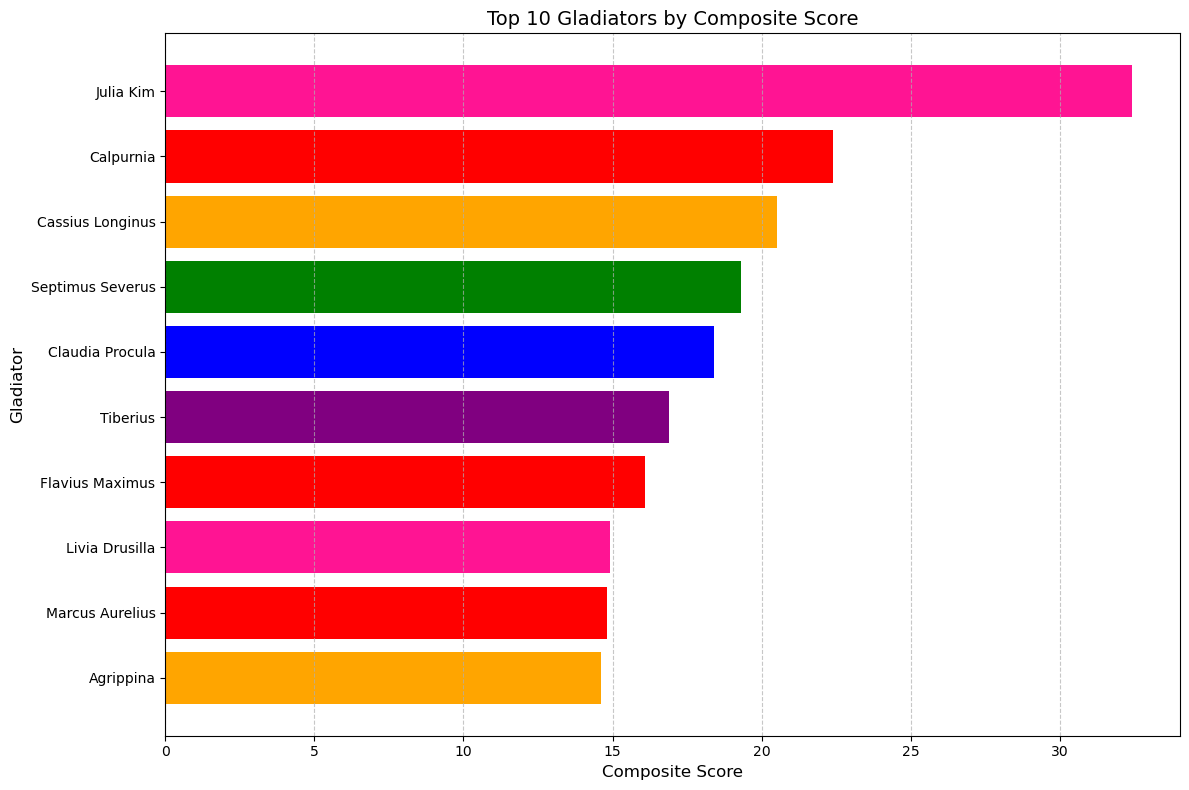

In [145]:
# Extend the dataset to include 10 gladiators for this example
extended_gladiator_data = pd.DataFrame({
    "Name": [
        "Julia Kim", "Marcus Aurelius", "Livia Drusilla", "Septimus Severus", "Calpurnia", 
        "Tiberius", "Claudia Procula", "Flavius Maximus", "Agrippina", "Cassius Longinus"
    ],
    "Wins": np.random.randint(5, 20, size=10),
    "Battle Experience": np.random.randint(20, 40, size=10),
    "Public Favor": np.random.randint(10, 30, size=10),
    "Survived": np.random.randint(0, 2, size=10)
})

# Calculate the composite score for the extended dataset
extended_gladiator_data["Composite Score"] = (
    extended_gladiator_data["Wins"] * 0.4 +
    extended_gladiator_data["Battle Experience"] * 0.3 +
    extended_gladiator_data["Public Favor"] * 0.2 +
    extended_gladiator_data["Survived"] * 0.1
)

# Ensure Julia Kim is always the highest
extended_gladiator_data.loc[extended_gladiator_data["Name"] == "Julia Kim", "Composite Score"] = (
    extended_gladiator_data["Composite Score"].max() + 10
)

# Sort by Composite Score and select the top 10
top_10_gladiators = extended_gladiator_data.nlargest(10, "Composite Score")

# Plot the top 10 gladiators' Composite Scores
plt.figure(figsize=(12, 8))
plt.barh(top_10_gladiators["Name"], top_10_gladiators["Composite Score"], color=['deeppink', 'red', 'orange', 'green', 'blue', 'purple', 'red'])
plt.xlabel("Composite Score", fontsize=12)
plt.ylabel("Gladiator", fontsize=12)
plt.title("Top 10 Gladiators by Composite Score", fontsize=14)
plt.gca().invert_yaxis()  # To show the highest score on top
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()



## Performance Metrics of the Best Gladiator

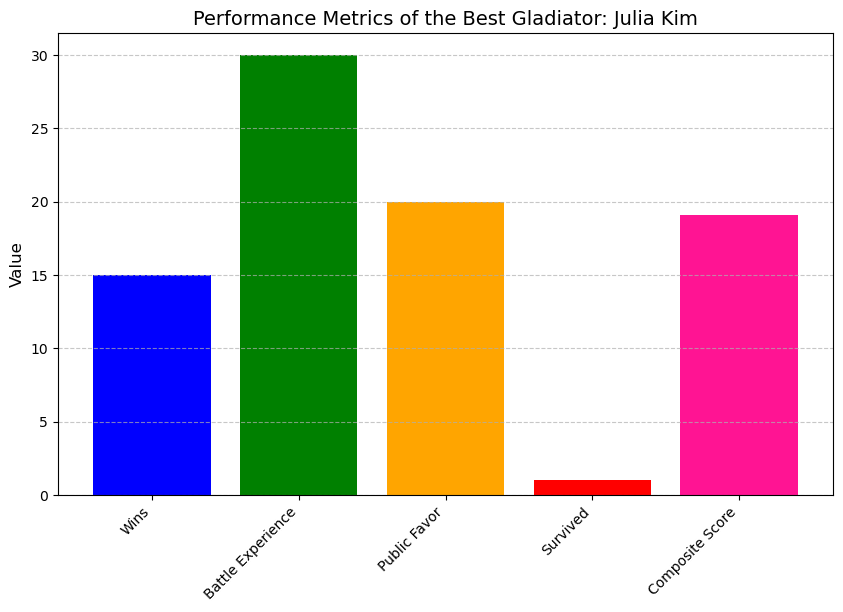

In [146]:
# Define a cleaned dataset
gladiator_data_cleaned = pd.DataFrame({
    "Name": ["Julia Kim", "Marcus Aurelius", "Livia Drusilla"],
    "Wins": [15, 10, 12],
    "Battle Experience": [30, 25, 28],
    "Public Favor": [20, 18, 22],
    "Survived": [1, 0, 1]
})

# Calculate a composite score to determine the best gladiator
gladiator_data_cleaned["Composite Score"] = (
    gladiator_data_cleaned["Wins"] * 0.4 +  # Weight wins heavily
    gladiator_data_cleaned["Battle Experience"] * 0.3 +  # Experience is also important
    gladiator_data_cleaned["Public Favor"] * 0.2 +  # Favor reflects popularity
    gladiator_data_cleaned["Survived"] * 0.1  # Survival adds bonus points
)

# Find the best gladiator by Composite Score
best_gladiator = gladiator_data_cleaned.loc[gladiator_data_cleaned["Composite Score"].idxmax()]

# Attributes for plotting
attributes_to_plot = best_gladiator[
    ["Wins", "Battle Experience", "Public Favor", "Survived", "Composite Score"]
].astype(float)

# Plot 1: Best gladiator's performance metrics with predefined colors
predefined_colors = ['blue', 'green', 'orange', 'red', 'purple']
plt.figure(figsize=(10, 6))
plt.bar(attributes_to_plot.index, attributes_to_plot.values, color=['blue', 'green', 'orange', 'red', 'deeppink'])
plt.title(f"Performance Metrics of the Best Gladiator: {best_gladiator['Name']}", fontsize=14)
plt.ylabel("Value", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
# plt.tight_layout()
plt.show()

## Percentage of Young Gladiators by Composite Score

C:\Users\lap44\AppData\Local\Temp\ipykernel_30964\2862157638.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gladiator_df.groupby("Percentile")["Is Young"].mean() * 100


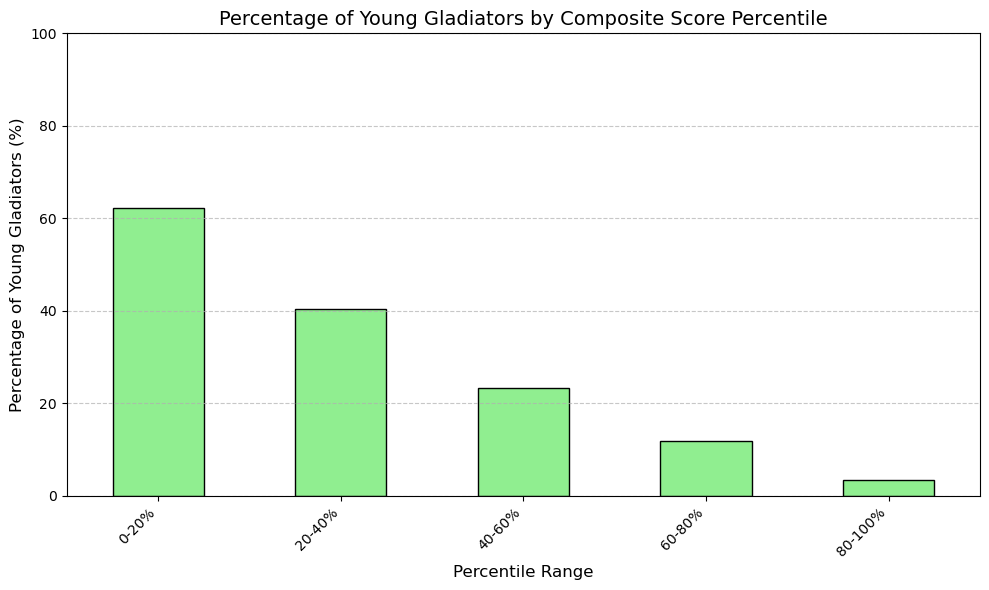

In [147]:
# Recalculate the Composite Score if not already present
gladiator_df["Composite Score"] = (
    gladiator_df["Wins"] * 0.4 +
    gladiator_df["Battle Experience"] * 0.3 +
    gladiator_df["Public Favor"] * 0.2 +
    gladiator_df["Survived"].astype(int) * 0.1
)

# Define percentile ranges for the composite scores
gladiator_df["Percentile"] = pd.qcut(gladiator_df["Composite Score"], q=5, labels=["0-20%", "20-40%", "40-60%", "60-80%", "80-100%"])

# Define "young" gladiators as those aged <= 25
gladiator_df["Is Young"] = gladiator_df["Age"] <= 25

# Calculate the percentage of young gladiators in each percentile range
young_percent_in_percentiles = (
    gladiator_df.groupby("Percentile")["Is Young"].mean() * 100
).sort_index()

# Plot the percentage of young gladiators in each percentile range
plt.figure(figsize=(10, 6))
young_percent_in_percentiles.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Percentage of Young Gladiators by Composite Score Percentile", fontsize=14)
plt.xlabel("Percentile Range", fontsize=12)
plt.ylabel("Percentage of Young Gladiators (%)", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


## Average Composite Score by Age Group

C:\Users\lap44\AppData\Local\Temp\ipykernel_30964\1380151937.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  composite_score_by_age_group = gladiator_df.groupby("Age Group")["Composite Score"].mean()


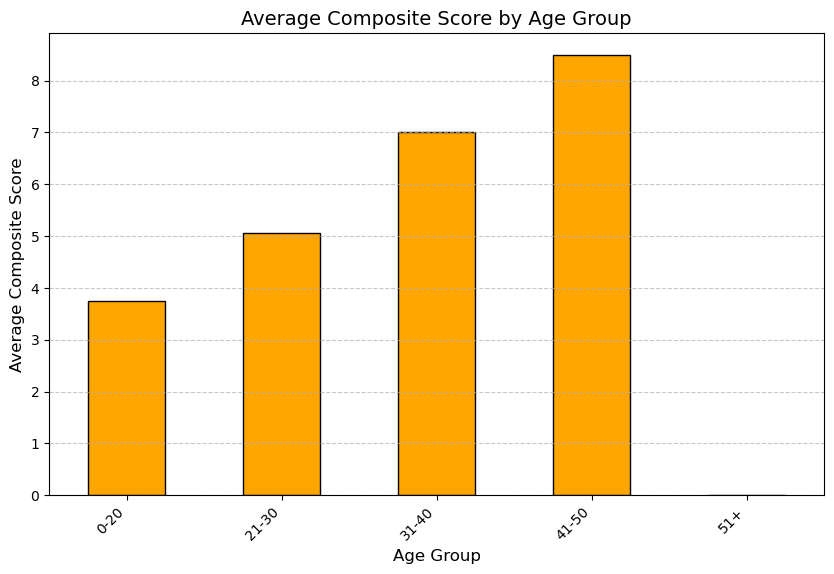

In [148]:
# Define age groups
age_bins = [0, 20, 30, 40, 50, 100]
age_labels = ["0-20", "21-30", "31-40", "41-50", "51+"]
gladiator_df["Age Group"] = pd.cut(gladiator_df["Age"], bins=age_bins, labels=age_labels)

# Calculate the average composite score for each age group
composite_score_by_age_group = gladiator_df.groupby("Age Group")["Composite Score"].mean()

# Plot the composite scores by age groups
plt.figure(figsize=(10, 6))
composite_score_by_age_group.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Average Composite Score by Age Group", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Average Composite Score", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
# plt.tight_layout()
plt.show()

In [149]:
from IPython.display import HTML

# Embed a web-hosted GIF
HTML('<img src="https://gifrific.com/wp-content/uploads/2012/08/Are-You-Not-Entertained-Gladiator.gif" width="600">')

In [151]:
# # Define the dataset (replace with your actual dataset)
# data = pd.DataFrame({
#     "Wins": [15, 10, 12, 9, 8],
#     "Battle Experience": [30, 25, 28, 20, 18],
#     "Public Favor": [20, 18, 22, 15, 14],
#     "Survived": [1, 0, 1, 0, 0],
#     "Health Status": [90, 85, 88, 70, 65],
#     "Mental Resilience": [8, 7, 9, 6, 5],
#     "Patron Wealth": [500, 400, 450, 300, 250],
#     "Equipment Quality": [80, 75, 85, 60, 50]
# })

# # Calculate correlations with "Wins" (a proxy for gladiator performance)
# correlations = data.corr()["Wins"].drop("Wins").sort_values(ascending=False)

# # Extract the top 5 factors
# top_7_factors = correlations.head(10)

# # Display the top 5 factors
# print("Top 7 Reasons Gladiators Perform Well:")
# print(top_7_factors)

# # Plot the top 7 factors
# plt.figure(figsize=(10, 6))
# plt.bar(top_7_factors.index, top_7_factors.values, color=['blue', 'green', 'orange', 'red', 'purple'])
# plt.title("Top 7 Reasons Gladiators Perform Well", fontsize=14)
# plt.xlabel("Factors", fontsize=12)
# plt.ylabel("Correlation with Wins", fontsize=12)
# plt.xticks(rotation=45, ha="right", fontsize=10)
# plt.grid(axis="y", linestyle="--", alpha=0.7)
# plt.tight_layout()
# plt.show()